# CELLULAR AUTOMATA

***

## 1) CONWAY'S GAME OF LIFE

### Import packages to manipulate matrices and plot things nicely

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from time import time
from tqdm import tqdm

### Main function that, given a grid at time `t`, returns a grid at time `t+1`

In [2]:
def iter_grid(old_grid): 
    '''
    Given an old grid (matrix of numbers), return a new grid using Conway's game of life algorithm.
    '''

    new_grid = np.zeros(old_grid.shape) # Fill the new grid with zeros to start with 
    
    # Iterate over every row (i) and column (j), except for the borders, which we don't touch
    for i in range(1, rows-1): 
        for j in range(1, columns-1):
            current_cell = old_grid[i, j]    # Get the value of the current grid
            
            num_neighbours = np.sum(old_grid[i-1:i+2, j-1:j+2]) - current_cell    # Get the number of alive 
                                                                                  # neighbours

            # Conway's game of life algorithm: 
            # if a cell is dead and has3 neighbours, make it alive again
            if current_cell == 0 and num_neighbours == 3:
                new_grid[i, j] = 1
            # if a cell is alive and has 2 or 3 neighbours, keep it alive
            elif current_cell == 1 and (num_neighbours == 2 or num_neighbours ==3):
                new_grid[i, j] = 1
            # otherwise, kill the cell. this isn't strictly necessary, cuz all the cells are filled with 
            # zeros anyways from the np.zeros line above, but whatever. 
            else:
                new_grid[i, j] = 0
                
    return new_grid

### Plot an example of an initial situation, with a 15x15 matrix

The grid:

 [[0 1 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 1 0 1 0 0 1 1 0 1 1 1 0]
 [1 0 1 1 0 1 0 0 1 0 0 1 1 1 1]
 [0 1 1 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 1 1 0 0 0 1 1]
 [0 0 1 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 1 0 0 0 1 0 1 1]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]
 [0 1 1 0 0 0 1 1 0 0 0 1 0 1 0]
 [0 0 1 0 1 1 0 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 1 1 0 1 0 0 1 1 0 0]
 [1 0 0 1 0 1 0 1 1 1 1 0 0 1 0]
 [1 1 1 0 0 0 1 0 0 0 1 0 1 0 1]
 [0 1 1 0 1 0 0 1 0 1 0 0 1 0 1]] 

becomes this, where each white square represents 0 and each black square represents 1



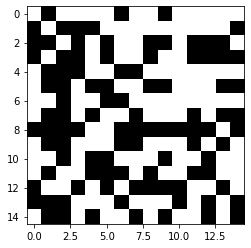

In [3]:
# Initialise
rows, columns = 15, 15
grid = np.random.randint(0, 2, size=(rows, columns)) # Creates a 15x15 grid full of randomly placed 0s and 1s

print("The grid:\n\n", grid, "\n")

print("becomes this, where each white square represents 0 and each black square represents 1\n")

plt.imshow(grid, cmap='Greys')
plt.show()

And after 1 iteration, we get a new grid

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


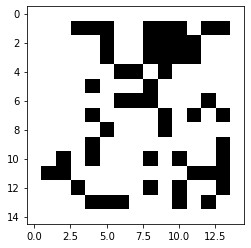

In [4]:
new_grid = iter_grid(grid)  # Calls the function iter_grid defined above on the old grid, in order
                            # to create a new grid using the Conway rules. 

print(new_grid)

plt.imshow(new_grid, cmap='Greys')
plt.show()

## Create the animation

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
rows, columns = 50, 50
grid = np.random.randint(0, 2, size=(rows, columns)) # Creates a rows x columns grid full of randomly placed
                                                     # 0s and 1s

# 
number_of_frames = 500
start = time() 

for i in tqdm(range(number_of_frames)):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set(xlim=(0, rows), ylim=(0, columns))
    plt.axis('off')
    grid = iter_grid(grid)
    plt.imshow(grid, cmap='Greys')
    plt.savefig(f'./images/conway_gol/{i:03d}.png')
    plt.close()
    

### ALTERNATIVE METHOD ###
### it's slightly faster, but harder to configure. it's easier to use ffmpeg manually on the images.
    
# # animation function.  This is called sequentially
# def animate(i):
#     grid=im.get_array()
#     grid=iter_grid(grid)
#     im.set_data(grid)
    
#     global number_of_frames, start
#     if i % 50 == 0:
#         print(f'frame {i}/{number_of_frames}, which took so far has taken {time() - start} seconds.')
    
#     return [im]

# anim = animation.FuncAnimation(fig, animate, frames=number_of_frames, interval=20)

# # save the animation as an mp4.  This requires ffmpeg, which you get by 
# # typing brew install ffmpeg a bunch of times in terminal until it works
# anim.save(f'conway_game_of_life_{rows}x{columns}.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# plt.show()

100%|██████████| 500/500 [00:55<00:00,  9.06it/s]


***

## 2) LANGTON'S ANTS

## Main 2 functions that, given a grid at time `t`, return a grid at time `t+1`

In [6]:
def new_xy(ant_x, ant_y, direction):
    '''
    If you give it an x and y value, and a direction, it will return the next x and y value of the ant.
    Basically just moves the ant east (direction = 0), north (direction = 90), west (direction = 180), or 
    south (direction = 270).
    '''
    if direction == 0:
        return (ant_x + 1, ant_y)
    if direction == 90:
        return (ant_x, ant_y - 1)
    if direction == 180:
        return (ant_x - 1, ant_y)
    if direction == 270:
        return (ant_x, ant_y + 1)

def next_ant_step(grid, ant_x, ant_y, ant_direction):
    
    new_grid = np.copy(grid)
    
    # If the current cell is black
    if grid[ant_x, ant_y] == 1: 
        # turn left (90 degrees clockwise)
        new_ant_direction =  (ant_direction + 90) % 360
        new_grid[ant_x, ant_y] = 0 # change current cell back to white
        
        ant_x, ant_y = new_xy(ant_x, ant_y, new_ant_direction)    
    # If the current cell is white
    else: 
        # turn right (90 degrees counter-clockwise)
        new_ant_direction =  (ant_direction - 90) % 360
        new_grid[ant_x, ant_y] = 1 # change current cell back to black
        
        ant_x, ant_y = new_xy(ant_x, ant_y, new_ant_direction)
        
    return new_grid, ant_x, ant_y, new_ant_direction

The grid:

 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 

becomes this, where each white square represents 0 



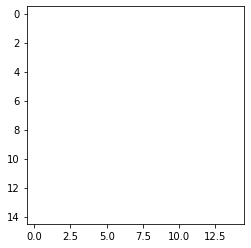

In [7]:
# Initialise
rows, columns = 15, 15
grid = np.random.randint(0, 1, (rows, columns)) # Creates a 15x15 grid full of randomly placed 0s

print("The grid:\n\n", grid, "\n")

print("becomes this, where each white square represents 0 \n")

plt.imshow(grid, cmap='Greys')
plt.show()

And if you start the grid off with some parameters, after 25 iterations you get the following grid

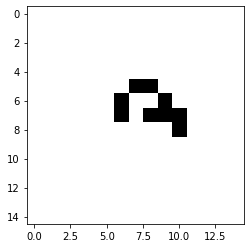

In [8]:
initial_x, initial_y = 7, 7    # start ant off in the middle of the grid
grid[initial_x, initial_y] = 1 # black rather than white
initial_direction = 90         # assume that the ant was pointing up
num_iters = 25

#first step
grid, x, y, direction = next_ant_step(grid, initial_x, initial_y, initial_direction)

for i in range(num_iters):
    grid, x, y, direction = next_ant_step(grid, x, y, direction)

plt.imshow(grid, cmap='Greys')
plt.show()

## Running the same animation code as before, you can make a video of the ant moving 

In [9]:
rows, cols = 20, 20
grid = np.random.randint(0, 1, (rows, cols)) # Creates a 15x15 grid full of randomly placed 0s

x, y = 10, 10            # start ant off in the middle of the grid
grid[x, y] = 1         # black rather than white
direction = 90         # assume that the ant was pointing up

# Define hyperparameters
number_of_frames = 400
start = time()




for i in tqdm(range(number_of_frames)):
    # Set up the figure
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set(xlim=(0, rows), ylim=(0, cols))
    plt.axis('off')
    grid, x, y, direction = next_ant_step(grid, x, y, direction)
    plt.imshow(grid, cmap='Greys')
    plt.savefig(f'./images/langtons_ants/{i:03d}.png')
    plt.close()


### ALTERNATIVE METHOD ###
### it's slightly faster, but harder to configure. it's easier to use ffmpeg manually on the images.

# # Set up animation function, which gets called sequentially
# def animate_it(i):
#     global number_of_frames, start
#     global grid, x, y, direction

#     grid, x, y, direction = next_ant_step(grid, x, y, direction)
#     im.set_data(grid)
    
#     if i % 50 == 0:
#         print(f'frame {i}/{number_of_frames}, which took so far has taken {time() - start} seconds.')

# # Create animation
# anim = FuncAnimation(fig, animate_it, interval=200, frames=number_of_frames)

# # Save animation
# anim.save(f'langton_ants_{rows}x{cols}.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    
# # Show last picture of animation
# plt.show()

100%|██████████| 400/400 [00:31<00:00, 12.90it/s]
